In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Используемое устройство: cuda:0


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

100%|██████████| 170M/170M [00:03<00:00, 48.7MB/s]


In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

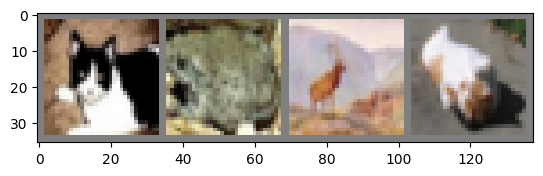

cat   frog  deer  cat  


In [ ]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
print("\nStart learning...")

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Learning has been finished!')


Start learning...
[1,  2000] loss: 2.202
[1,  4000] loss: 1.901
[1,  6000] loss: 1.705
[1,  8000] loss: 1.607
[1, 10000] loss: 1.527
[1, 12000] loss: 1.488
[2,  2000] loss: 1.430
[2,  4000] loss: 1.393
[2,  6000] loss: 1.367
[2,  8000] loss: 1.320
[2, 10000] loss: 1.299
[2, 12000] loss: 1.293
Learning has been finished!


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'\nPrecision with 10000 test pictures is: {100 * correct / total:.2f} %')


Precision with 10000 test pictures is: 56.17 %


In [ ]:
# Increasing amount of epohs

In [ ]:
print("\nStart learning...")

for epoch in range(15):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Learning has been finished!')


Start learning...
[1,  2000] loss: 1.221
[1,  4000] loss: 1.234
[1,  6000] loss: 1.194
[1,  8000] loss: 1.188
[1, 10000] loss: 1.197
[1, 12000] loss: 1.170
[2,  2000] loss: 1.099
[2,  4000] loss: 1.104
[2,  6000] loss: 1.085
[2,  8000] loss: 1.122
[2, 10000] loss: 1.101
[2, 12000] loss: 1.095
[3,  2000] loss: 1.013
[3,  4000] loss: 1.014
[3,  6000] loss: 1.035
[3,  8000] loss: 1.050
[3, 10000] loss: 1.015
[3, 12000] loss: 1.030
[4,  2000] loss: 0.932
[4,  4000] loss: 0.944
[4,  6000] loss: 0.947
[4,  8000] loss: 0.984
[4, 10000] loss: 0.990
[4, 12000] loss: 0.988
[5,  2000] loss: 0.864
[5,  4000] loss: 0.905
[5,  6000] loss: 0.928
[5,  8000] loss: 0.927
[5, 10000] loss: 0.937
[5, 12000] loss: 0.949
[6,  2000] loss: 0.835
[6,  4000] loss: 0.878
[6,  6000] loss: 0.878
[6,  8000] loss: 0.890
[6, 10000] loss: 0.894
[6, 12000] loss: 0.913
[7,  2000] loss: 0.816
[7,  4000] loss: 0.811
[7,  6000] loss: 0.838
[7,  8000] loss: 0.850
[7, 10000] loss: 0.867
[7, 12000] loss: 0.903
[8,  2000] loss

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'\nPrecision with 10000 test pictures is: {100 * correct / total:.2f} %')


Precision with 10000 test pictures is: 61.86 %


In [ ]:
# Improving model

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 128 * 4 * 4)
        x = self.dropout1(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
print("\nStart learning...")

for epoch in range(15):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Learning has been finished!')


Start learning...
Learning has been finished!


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'\nPrecision with 10000 test pictures is: {100 * correct / total:.2f} %')


Precision with 10000 test pictures is: 76.17 %


In [ ]:
# Adding Learning Rate Scheduling

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform_train)

In [ ]:
train_size = int(0.8 * len(full_trainset))
val_size = len(full_trainset) - train_size
train_subset, val_subset = torch.utils.data.random_split(full_trainset, [train_size, val_size])

In [ ]:
print(f"Train size: {len(train_subset)}")
print(f"Validation size: {len(val_subset)}")

Train size: 40000
Validation size: 10000


In [ ]:
trainloader = torch.utils.data.DataLoader(train_subset, batch_size=64,
                                          shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_subset, batch_size=64,
                                        shuffle=False, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)

In [ ]:
print("\nStart learning")
num_epochs = 20
for epoch in range(num_epochs):

    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(trainloader)

    net.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    avg_val_loss = running_val_loss / len(valloader)

    scheduler.step(avg_val_loss)

    current_lr = optimizer.param_groups[0]['lr']

    print(f"Эпоха [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, "
          f"Validation Loss: {avg_val_loss:.4f}, "
          f"Current LR: {current_lr:.6f}")


print('Learning has been finished!')


Start learning
Эпоха [1/20], Train Loss: 1.6798, Validation Loss: 1.4089, Current LR: 0.001000
Эпоха [2/20], Train Loss: 1.3514, Validation Loss: 1.2034, Current LR: 0.001000
Эпоха [3/20], Train Loss: 1.1940, Validation Loss: 1.1151, Current LR: 0.001000
Эпоха [4/20], Train Loss: 1.0894, Validation Loss: 0.9424, Current LR: 0.001000
Эпоха [5/20], Train Loss: 1.0094, Validation Loss: 0.9270, Current LR: 0.001000
Эпоха [6/20], Train Loss: 0.9577, Validation Loss: 0.8638, Current LR: 0.001000
Эпоха [7/20], Train Loss: 0.9174, Validation Loss: 0.8549, Current LR: 0.001000
Эпоха [8/20], Train Loss: 0.8795, Validation Loss: 0.8064, Current LR: 0.001000
Эпоха [9/20], Train Loss: 0.8562, Validation Loss: 0.8262, Current LR: 0.001000
Эпоха [10/20], Train Loss: 0.8239, Validation Loss: 0.7684, Current LR: 0.001000
Эпоха [11/20], Train Loss: 0.8035, Validation Loss: 0.7403, Current LR: 0.001000
Эпоха [12/20], Train Loss: 0.7877, Validation Loss: 0.7445, Current LR: 0.001000
Эпоха [13/20], Train 

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'\nPrecision with 10000 test pictures is: {100 * correct / total:.2f} %')


Precision with 10000 test pictures is: 78.57 %
